<a href="https://colab.research.google.com/github/ShraddhaP123/Prediction-using-Supervised-ML/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 : Prediction using Supervised ML**



**Data Science & Business Analytics** 

**The Spark Foundation July 21**

**Author : Shraddha Pattanshetti**

**OBJECTIVE : Predict the percentage of an student based on the no. of study hours.**


In [36]:
# IMPORTING ALL THE REQUIRED LIBRARIES LIKE PANDAS, NUMPY, MATPLOTLIB, SEABORN, SKLEARN, MATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math


In [8]:
# READ A CSV FILE 

Link = "http://bit.ly/w-data"
df = pd.read_csv(Link)
print("Data from a CSV File Read Successfully")

Data from a CSV File Read Successfully


In [11]:
# PRINT FIRST 5 RECORDS IN THE FILE

df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# CHECKING IF DATA CONSISTS ANY NULL VALUE

df.isnull == True 

False

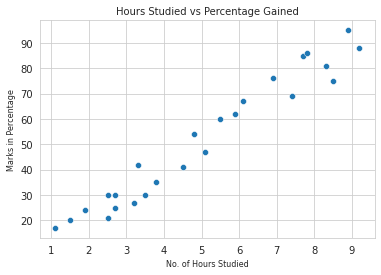

In [14]:
# PLOT THE SCORES DISTRIBUTION IN ORDER TO FIND RELATION BETWEEN THE DATA

sns.set_style('whitegrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Hours Studied vs Percentage Gained',size=10)
plt.ylabel('Marks in Percentage', size=8)
plt.xlabel('No. of Hours Studied', size=8)
plt.show()

**FROM ABOVE PLOT WE CAN CLEARLY DETERMINE THAT THERE IS A POSITIVE LINEAR RELATION BETWEEN NO. OF HOURS STUDIED AND MARKS IN PERCENTAGE OBTAINED BY STUDENT**

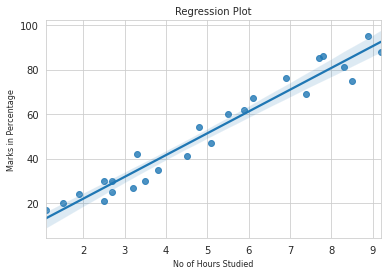

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
# REGRESSION PLOT 

sns.set_style('whitegrid')
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=10)
plt.ylabel('Marks in Percentage', size=8)
plt.xlabel('No of Hours Studied', size=8)
plt.show()
print(df.corr())

**REGRESSION PLOT PROVES THE POSITIVE CORELATION BETWEEN THE ABOVE DATA**

**1.**   **DATA PREPARATION**




In [19]:
# DIVIDE DATA INTO ATTRIBUTES(INPUTS) AND LABELS(OUTPUTS)

X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

In [21]:
# SPLITTING DATA INTO TRAINING AND TESTING DATASETS

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


**2.   TRAINING THE ALGORITHM**



In [22]:
# TRAINING THE ALGORITHM USING LINEAR REGRESSION MODEL

regression = LinearRegression()
regression.fit(X_train, Y_train)
print("Successful completion of training the model")

Successful completion of training


**3.   MAKING PREDICTION**


In [23]:
# PRINTING TESTING DATA

print(X_test) 

# PREDICTING THE SCORES

Y_prediction = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in Y_prediction]})
prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [25]:
# COMPARING ACTUAL WITH PREDICTED VALUE

C_Scores = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': Y_prediction})
C_Scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


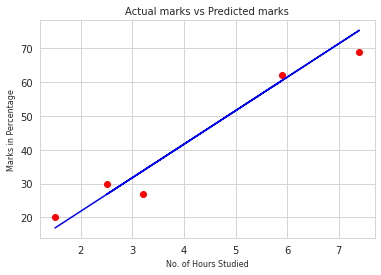

In [26]:
# VISUALLY COMPARING ACTUAL WITH PREDICTED VALUE

plt.scatter(x=X_test, y=Y_test, color='Red')
plt.plot(X_test, Y_prediction, color='Blue')
plt.title('Actual marks vs Predicted marks', size=10)
plt.ylabel('Marks in Percentage', size=8)
plt.xlabel('No. of Hours Studied', size=8)
plt.show()

**4.   MODEL EVALUATION**

In [37]:
# CALCULATING THE ACCURACY OF THE MODEL
print('Mean Absolute Error: ', mean_absolute_error(Y_test, Y_prediction))
print('Mean Squared Error: ', mean_squared_error(Y_test, Y_prediction))
print('Root Mean Square Error: ', math.sqrt(mean_squared_error(Y_test, Y_prediction)))

Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Square Error:  4.647447612100373


**PREDICTED SCORE WHEN STUDENT STUDIES FOR 9.25 HRS/DAY**

In [44]:
# PREDICTING THE PERCENTAGE WHEN HOUR=9.25

Hours = [9.25]
Predicted_percentage = regression.predict([Hours])
print("Predicted Score = {}".format(Predicted_percentage[0],3))

Predicted Score = 93.69173248737539


**TO CONCLUDE, AFTER SPENDING 9.25 HOURS STUDYING, IT IS LIKELY THAT THE STUDENT GETS 93.69 PERCENT MARKS**